In [2]:
import torch
from transformers import T5ForConditionalGeneration, T5Tokenizer
import wikipediaapi


In [11]:
model_name = "t5-small"
model = T5ForConditionalGeneration.from_pretrained(model_name)
tokenizer = T5Tokenizer.from_pretrained(model_name)

In [12]:
user_agent = "MyWikipediaSummarizer/1.0"

wiki_wiki = wikipediaapi.Wikipedia(language="en", user_agent=user_agent)


In [13]:
print("Enter Page Title: ")
page_title = input("Page Title is")

Enter Page Title: 


Page Title is COVID-19


In [10]:
#page_title = "Artificial_intelligence"


In [14]:
page = wiki_wiki.page(page_title)
article1 = page.text

In [4]:
article = """
Back in the 1950s, the fathers of the field, Minsky and McCarthy, described artificial intelligence as any task performed by a machine that would have previously been considered to require human intelligence.

That's obviously a fairly broad definition, which is why you will sometimes see arguments over whether something is truly AI or not.

Modern definitions of what it means to create intelligence are more specific. Francois Chollet, an AI researcher at Google and creator of the machine-learning software library Keras, has said intelligence is tied to a system's ability to adapt and improvise in a new environment, to generalise its knowledge and apply it to unfamiliar scenarios.

"Intelligence is the efficiency with which you acquire new skills at tasks you didn't previously prepare for," he said.

"Intelligence is not skill itself; it's not what you can do; it's how well and how efficiently you can learn new things."

It's a definition under which modern AI-powered systems, such as virtual assistants, would be characterised as having demonstrated 'narrow AI', the ability to generalise their training when carrying out a limited set of tasks, such as speech recognition or computer vision.

Typically, AI systems demonstrate at least some of the following behaviours associated with human intelligence: planning, learning, reasoning, problem-solving, knowledge representation, perception, motion, and manipulation and, to a lesser extent, social intelligence and creativity.

AlexNet's performance demonstrated the power of learning systems based on neural networks, a model for machine learning that had existed for decades but that was finally realising its potential due to refinements to architecture and leaps in parallel processing power made possible by Moore's Law. The prowess of machine-learning systems at carrying out computer vision also hit the headlines that year, with Google training a system to recognise an internet favorite: pictures of cats.

The next demonstration of the efficacy of machine-learning systems that caught the public's attention was the 2016 triumph of the Google DeepMind AlphaGo AI over a human grandmaster in Go, an ancient Chinese game whose complexity stumped computers for decades. Go has about possible 200 moves per turn compared to about 20 in Chess. Over the course of a game of Go, there are so many possible moves that are searching through each of them in advance to identify the best play is too costly from a computational point of view. Instead, AlphaGo was trained how to play the game by taking moves played by human experts in 30 million Go games and feeding them into deep-learning neural networks.
"""

In [15]:
inputs = tokenizer.encode("summarize: " + article1, return_tensors="pt", max_length=512, truncation=True)
summary_ids = model.generate(inputs, max_length=150, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [16]:
print(summary)

the first known case was identified in Wuhan, China, in December 2019. the disease quickly spread worldwide, resulting in the COVID-19 pandemic. symptoms may begin one to fourteen days after exposure to the virus.


In [5]:
inputs = tokenizer.encode("summarize: " + article, return_tensors="pt", max_length=512, truncation=True)
summary_ids = model.generate(inputs, max_length=150, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)


In [6]:
print("Generated Summary:")
print(summary)


Generated Summary:
artificial intelligence is tied to a system's ability to adapt and improvise in a new environment. it's not skill itself; it's not what you can do; it's how well and how efficiently you can learn new things. modern AI-powered systems, such as virtual assistants, would be characterised as having demonstrated 'narrow AI'


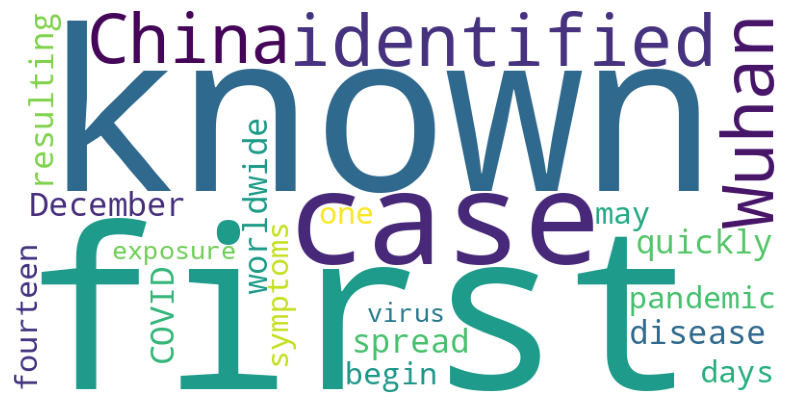

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(summary)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


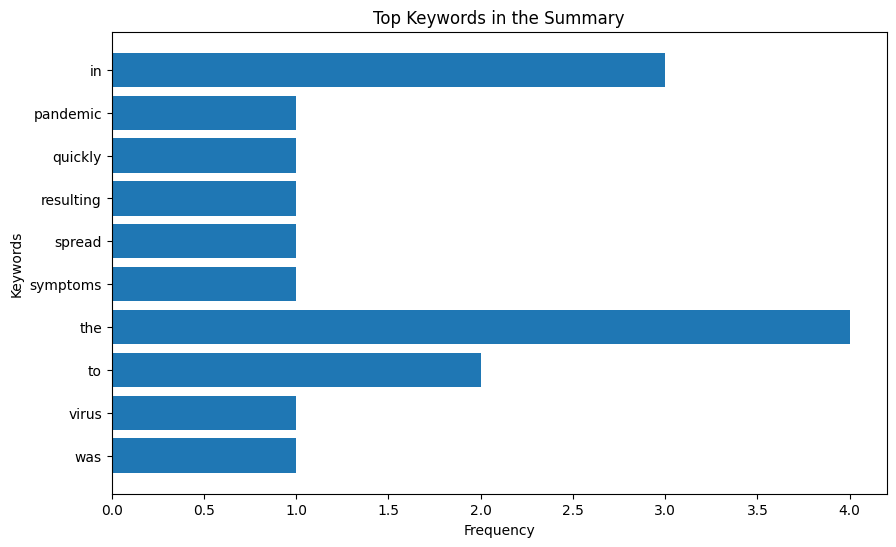

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

summary_tokens = summary.split()

vectorizer = CountVectorizer(max_features=10)  
X = vectorizer.fit_transform(summary_tokens)

keywords = vectorizer.get_feature_names_out()
keyword_frequencies = X.sum(axis=0).A1

plt.figure(figsize=(10, 6))
plt.barh(keywords, keyword_frequencies)
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.title('Top Keywords in the Summary')
plt.gca().invert_yaxis()  
plt.show()
